In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
import pickle
import seaborn as sns
from scipy import stats
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3b572312207d49bcb18f00798fd7f731 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jPMXlVLpbVOiI6Drgjk6elKvlMEKHzQ6U0CoRYlF5jLl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_3b572312207d49bcb18f00798fd7f731.get_object(Bucket='houserant-donotdelete-pr-gkkthlir9ajnwf',Key='99acres_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
0,mumbai,17500.0,1.0,2 Baths,470,Carpet Area,Residential,Kolshet Road,75000.0
1,mumbai,75000.0,3.0,3 Baths,1800,Super built-up Area,Residential,Sector 21 Nerul,400000.0
2,mumbai,60000.0,2.0,2 Baths,950,Super built-up Area,Residential,Wadala,200000.0
3,mumbai,52000.0,3.0,3 Baths,1300,Carpet Area,Residential,Hiranandani Estate,300000.0
4,mumbai,30000.0,1.0,1 Bath,550,Built-up Area,Residential,Kanjurmarg (East),150000.0


Numbers of Area type:

Super built-up Area    69918
Carpet Area            36847
Built-up Area          29104
Plot Area              10659
Name: build_up_area, dtype: int64


<AxesSubplot:xlabel='build_up_area', ylabel='count'>

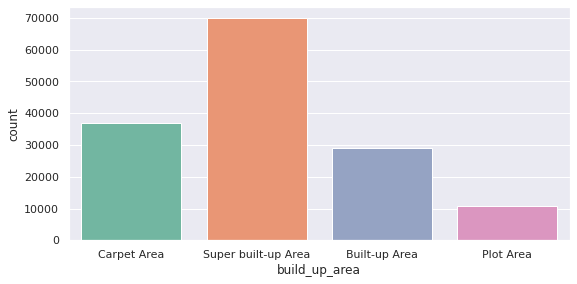

In [3]:
print('Numbers of Area type:')
print()
print(df["build_up_area"].value_counts())
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='build_up_area',data=df,palette="Set2")

Types of property : 

Residential    102024
Independent     41243
Studio           2606
Serviced          363
Farm              161
for               118
Floor              13
Name: Type_of_property, dtype: int64


<AxesSubplot:xlabel='Type_of_property', ylabel='count'>

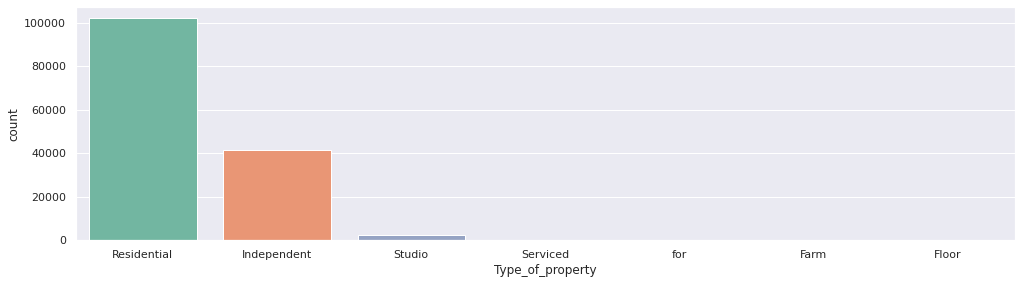

In [4]:
print("Types of property : ")
print()
print(df["Type_of_property"].value_counts())
sns.set(rc={'figure.figsize':(15,4)})
sns.countplot(x="Type_of_property",data=df,palette="Set2")

Property located based on city : 

ncr            42016
mumbai         37566
bangalore      25600
pune           18176
chennai         9973
hyderabad       7131
Ahmedabad       5602
Trivandraum      464
Name: city, dtype: int64


<AxesSubplot:xlabel='city', ylabel='count'>

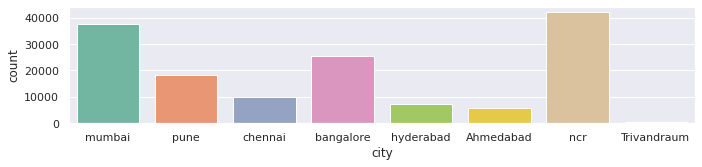

In [5]:
print("Property located based on city : ")
print()
print(df["city"].value_counts())
sns.set(rc={"figure.figsize":(10,2)})
sns.countplot(x="city",data=df,palette="Set2")

<AxesSubplot:xlabel='monthly_rant'>

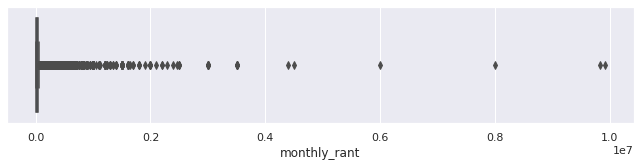

In [6]:
sns.boxplot(df["monthly_rant"])

<AxesSubplot:>

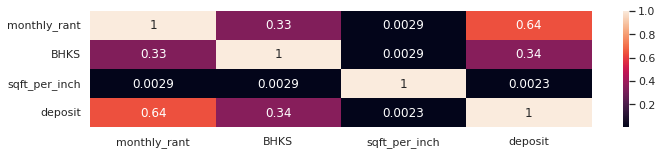

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.describe(include="all")

,city,monthly_rant,BHKS,Baths,sqft_per_inch,build_up_area,Type_of_property,location_of_the_property,deposit
count,146528,1.465280e+05,146528.000000,146528,1.465280e+05,146528,146528,146528,1.465280e+05
unique,8,NaN,NaN,41,NaN,4,7,12555,NaN
top,ncr,NaN,NaN,2 Baths,NaN,Super built-up Area,Residential,Goregaon (East),NaN
freq,42016,NaN,NaN,68767,NaN,69918,102024,807,NaN
mean,NaN,3.414242e+04,2.159703,NaN,2.463806e+03,NaN,NaN,NaN,1.203667e+05
std,NaN,8.428243e+04,1.107673,NaN,1.816119e+05,NaN,NaN,NaN,2.937736e+05
min,NaN,5.000000e+02,1.000000,NaN,1.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,NaN,1.300000e+04,1.000000,NaN,6.800000e+02,NaN,NaN,NaN,3.000000e+04
50%,NaN,2.000000e+04,2.000000,NaN,1.057000e+03,NaN,NaN,NaN,6.000000e+04
75%,NaN,3.290000e+04,3.000000,NaN,1.500000e+03,NaN,NaN,NaN,1.250000e+05


In [9]:
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
Baths                       0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

In [10]:
df.drop(["Baths","location_of_the_property"],axis=1,inplace=True)

In [11]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [12]:
df=df[df.Type_of_property!="for"]
df=df[df.Type_of_property!="Serviced"]
df=df[df.Type_of_property!="Floor"]

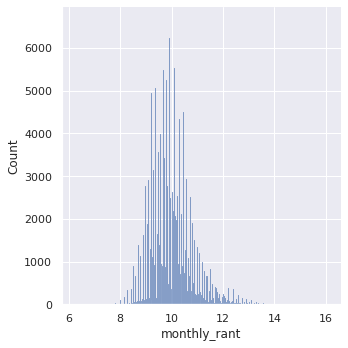

In [13]:
df["monthly_rant"]=np.log1p(df["monthly_rant"])
sns.displot(df["monthly_rant"])

In [14]:
city=LabelEncoder()
b_u_a=LabelEncoder()
T_o_p=LabelEncoder()
#l_o_t_p=LabeelEncoder()
df["city"]=city.fit_transform(df["city"])
df["build_up_area"]=b_u_a.fit_transform(df["build_up_area"])
df["Type_of_property"]=T_o_p.fit_transform(df["Type_of_property"])
#df["location_of_the_property"]=l_o_t_p.fit_transform(df["location_of_the_property"])
print("city",df["city"].unique())
print(city.inverse_transform(list(df["city"].unique())))
print()
print("build_up_area:",df["build_up_area"].unique())
print(b_u_a.inverse_transform(list(df["build_up_area"].unique())))
print()
print("Type_of_property",df["Type_of_property"].unique())
print(T_o_p.inverse_transform(list(df["Type_of_property"].unique())))
print()
#print("location_of_the_property",df["location+of_the_property"].unique())
#print(l_o_t_p.inverse_transform(list(df["location_of_the_property"].unique())))

city [5 7 3 2 4 0 6 1]
['mumbai' 'pune' 'chennai' 'bangalore' 'hyderabad' 'Ahmedabad' 'ncr'
 'Trivandraum']

build_up_area: [1 3 0 2]
['Carpet Area' 'Super built-up Area' 'Built-up Area' 'Plot Area']

Type_of_property [2 1 3 0]
['Residential' 'Independent' 'Studio' 'Farm']



In [15]:
x=df.drop("monthly_rant",axis=1)
#splitting the data into training set & test set
y=df.monthly_rant
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print("shape of xtrain{}".format(xtrain.shape))
print("shape of xtest{}".format(xtest.shape))
print("shape of ytrain{}".format(ytrain.shape))
print("shape of ytest{}".format(ytest.shape))

shape of xtrain(116827, 6)
shape of xtest(29207, 6)
shape of ytrain(116827,)
shape of ytest(29207,)


In [16]:
# data normalization
st=StandardScaler()
xtrain_scaled=st.fit_transform(xtrain)
xtest_scaled=st.transform(xtest)

In [17]:

    lr=LinearRegression()
    lr.fit(xtrain_scaled,ytrain)
    ypred=lr.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print("***Linear Regression model***")
    print("Score for Linear Regression model is {}".format(score))
    print("  rmse score for Linear Regression model is {}".format(rmse))

***Linear Regression model***
Score for Linear Regression model is 0.47784477380544765
  rmse score for Linear Regression model is 0.574125771758495


In [18]:

    gb=GradientBoostingRegressor()
    gb.fit(xtrain_scaled,ytrain)
    ypred=gb.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print("***Gradient Boosting Regressor model***")
    print("Score for Linear Regression model is {}".format(score))
    print("rmse score for Linear Regression model is {}".format(rmse))

***Gradient Boosting Regressor model***
Score for Linear Regression model is 0.877853968570921
rmse score for Linear Regression model is 0.2776814754062416


In [19]:
    rf=RandomForestRegressor()
    rf.fit(xtrain_scaled,ytrain)
    ypred=rf.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print("***Random Forest regression model***")
    print("Score for Linear Regression model is {}".format(score))
    print("rmse score for Linear Regression model is {}".format(rmse))

***Random Forest regression model***
Score for Linear Regression model is 0.8942035391643416
rmse score for Linear Regression model is 0.25842992257656405


In [20]:
xtrain_scaled[0]

array([ 1.26263043, -1.08795294, -0.01036924, -0.67800246,  0.55317963,
       -0.27943874])

In [21]:
!pip install ibm_watson_machine_learning

In [22]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
                    "url": "https://us-south.ml.cloud.ibm.com",
                    "apikey":"t_r2UKO_SlLOh31iZa7-_G5FuseAaLyhccUdhvFdnsyI"
                }
client=APIClient(wml_credentials)


In [23]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space["resources"] if item["entity"]["name"]==space_name)["metadata"]["id"])

In [24]:
space_uid=guid_from_space_name(client,"models")
print("Space UID = "+space_uid)

Space UID = c468ca5f-d716-49ed-bd36-cb6500eabfc9


In [25]:
client.set.default_space(space_uid)

'SUCCESS'

In [26]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [27]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [30]:
model_details=client.repository.store_model(model=rf,meta_props={
    client.repository.ModelMetaNames.NAME:"House_Rant",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_id(model_details)

In [31]:
model_id

'70d76440-d291-471c-9f70-ceb9609c8f61'

In [32]:
xtrain_scaled[0]

array([ 1.26263043, -1.08795294, -0.01036924, -0.67800246,  0.55317963,
       -0.27943874])

In [34]:
rf.predict([[ 1.26263043, -1.08795294, -0.01036924, -0.67800246,  0.55317963,
       -0.27943874]])

array([9.54083925])